In [1]:
import wandb

In [2]:
# Fetch runs from the specified project where correct_metric_sign is True
entity = "andresvanschel"
project = "eap"
api = wandb.Api()
runs = api.runs(f"{entity}/{project}", {"config.correct_metric_sign": True})
print(f"Found {len(runs)} runs with correct_metric_sign=True")

Found 69 runs with correct_metric_sign=True


In [ ]:
# print("test")
# # Display information about the filtered runs
# for run in runs:
#     print(f"Run: {run.name}, ID: {run.id}, Created: {run.created_at}")
#     depth = int(run.name.split("-")[2].split("_")[0][-1])
#     # Add model_depth parameter to the run configuration
#     if run.config.get("model_depth") is None:
#         run.config["model_depth"] = depth
#     if run.config.get("attr_absolute_val") is None:
#         run.config["attr_absolute_val"] = True
#     # run.config["model_depth"] = depth
#     print(f"Model Depth: {run.config['model_depth']}")
#     # Update the run configuration with the new parameter
#     run.update()
#     # Print the updated configuration
#     # print(f"Updated run config: {run.config}")

In [ ]:
# # Get the target run
# target_run = api.run(f"{entity}/{project}/jurxq02a")
# target_date = target_run.created_at

# # Update attr_absolute_val for all runs created before the target run
# update_count = 0
# for run in runs:
#     if run.created_at < target_date:
#         print(f"Updating run: {run.name}, ID: {run.id}, Created: {run.created_at}")
#         run.config["attr_absolute_val"] = True
#         run.update()
#         update_count += 1

# print(f"Updated attr_absolute_val=True for {update_count} runs created before {target_date}")

In [3]:
MODEL_DEPTH = 1
PROOF_DEPTH = None
PROOF_STRATEGY = "all"
ATTR_ABSOLUTE_VAL = True

In [8]:
all_filtered_runs = []
markers = []
labels = []
colors = []

eap_acdc_runs = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == MODEL_DEPTH) and 
       (run.config.get("proof_depth") is PROOF_DEPTH) and 
       (run.config.get("proof_strategy") == PROOF_STRATEGY) and
       (run.config.get("num_examples") == 10)
]
print(f"Filtered N=10 runs: {len(eap_acdc_runs)}")
all_filtered_runs.append(eap_acdc_runs)
markers.append('o')
labels.append("(D1, PS=all, RD=all)")
colors.append('blue')

eap_acdc_runs_n20 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == MODEL_DEPTH) and 
       (run.config.get("proof_depth") is PROOF_DEPTH) and 
       (run.config.get("proof_strategy") == PROOF_STRATEGY) and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered N=20 runs: {len(eap_acdc_runs_n20)}")
all_filtered_runs.append(eap_acdc_runs_n20)
markers.append('^')
labels.append("(D1, PS=all, RD=all)")
colors.append('blue')

eap_acdc_runs_n50 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == MODEL_DEPTH) and 
       (run.config.get("proof_depth") is PROOF_DEPTH) and 
       (run.config.get("proof_strategy") == PROOF_STRATEGY) and
       (run.config.get("num_examples") == 50)
]
print(f"Filtered N=50 runs: {len(eap_acdc_runs_n50)}")
all_filtered_runs.append(eap_acdc_runs_n50)
markers.append('p')
labels.append("(D1, PS=all, RD=all)")
colors.append('blue')

eap_acdc_runs_proof = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == MODEL_DEPTH) and 
       (run.config.get("proof_depth") == 1) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, rd=1 runs: {len(eap_acdc_runs_proof)}")
all_filtered_runs.append(eap_acdc_runs_proof)
markers.append('^')
labels.append("(D1, PS='proof', RD=1)")
colors.append('green')

eap_acdc_runs_proof_depth0 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == 0) and 
       (run.config.get("proof_depth") == 0) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, rd=0 runs: {len(eap_acdc_runs_proof_depth0)}")
all_filtered_runs.append(eap_acdc_runs_proof_depth0)
markers.append('^')
labels.append("(D0, PS='proof', RD=0)")
colors.append('yellow')

eap_acdc_runs_proof_depth2 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == 2) and 
       (run.config.get("proof_depth") == 2) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, depth=2, rd=2 runs: {len(eap_acdc_runs_proof_depth2)}")
all_filtered_runs.append(eap_acdc_runs_proof_depth2)
markers.append('^')
labels.append("(D2, PS='proof', RD=2)")
colors.append('red')


eap_acdc_runs_depth2_proof_depth1 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == 2) and 
       (run.config.get("proof_depth") == 1) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, depth2, rd=1 runs: {len(eap_acdc_runs_depth2_proof_depth1)}")
all_filtered_runs.append(eap_acdc_runs_depth2_proof_depth1)
markers.append('^')
labels.append("(D2, PS='proof', RD=1)")
colors.append('purple')

eap_acdc_runs_depth2_proof_depth0 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == 2) and 
       (run.config.get("proof_depth") == 0) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, depth2, rd=1 runs: {len(eap_acdc_runs_depth2_proof_depth0)}")
all_filtered_runs.append(eap_acdc_runs_depth2_proof_depth0)
markers.append('^')
labels.append("(D2, PS='proof', RD=0)")
colors.append('pink')

eap_acdc_runs_depth1_proof_depth0 = [
    run for run in runs 
    if (run.config.get("attr_absolute_val") == ATTR_ABSOLUTE_VAL) and 
       (run.summary.get("acdc_num_edges") is not None) and 
       (run.config.get("model_depth") == 1) and 
       (run.config.get("proof_depth") == 0) and 
       (run.config.get("proof_strategy") == 'proof') and
       (run.config.get("num_examples") == 20)
]
print(f"Filtered proof, depth2, rd=1 runs: {len(eap_acdc_runs_depth1_proof_depth0)}")
all_filtered_runs.append(eap_acdc_runs_depth1_proof_depth0)
markers.append('^')
labels.append("(D1, PS='proof', RD=0)")
colors.append('orange')

Filtered N=10 runs: 5
Filtered N=20 runs: 2
Filtered N=50 runs: 1
Filtered proof, rd=1 runs: 3
Filtered proof, rd=0 runs: 1
Filtered proof, depth=2, rd=2 runs: 2
Filtered proof, depth2, rd=1 runs: 1
Filtered proof, depth2, rd=1 runs: 1
Filtered proof, depth2, rd=1 runs: 1


In [5]:

import pandas as pd

node_dataframes = []
edge_dataframes = []
for i, filtered_runs in enumerate(all_filtered_runs):

    # Create dataframes with the necessary data
    nodes_data = []
    edges_data = []

    for run in filtered_runs:
        # Get the key metrics
        acdc_num_nodes = run.summary.get("acdc_num_nodes")[0]
        acdc_num_edges = run.summary.get("acdc_num_edges")[0]
        eap_num_nodes = run.summary.get("acdcpp_num_nodes")[0]
        eap_num_edges = run.summary.get("acdcpp_num_edges")[0]
        cur_metric = run.summary.get("cur_metric")
        threshold = run.config.get("threshold", 0)  # Default to 0 if not present
        try:
            cur_metric_history = run.scan_history(keys=["cur_metric"])
            experiment_cur_metric = run.scan_history(keys=["experiment.cur_metric"])
            full_model_metric = next(cur_metric_history)['cur_metric']
            post_eap_metric = next(experiment_cur_metric)['experiment.cur_metric']
        except Exception as e:
            print(f"Error retrieving initial metric: {e}")
            
        
        if acdc_num_nodes is not None and cur_metric is not None:
            nodes_data.append({
                'acdc_num_nodes': acdc_num_nodes,
                'eap_num_nodes': eap_num_nodes,
                'cur_metric': cur_metric, 
                'threshold': threshold,
                'post_eap_metric': post_eap_metric,
                'full_model_metric': full_model_metric,
                'run_name': run.name
            })
        
        if acdc_num_edges is not None and cur_metric is not None:
            edges_data.append({
                'acdc_num_edges': acdc_num_edges,
                'eap_num_edges': eap_num_edges,
                'cur_metric': cur_metric, 
                'threshold': threshold,
                'post_eap_metric': post_eap_metric,
                'full_model_metric': full_model_metric,
                'run_name': run.name
            })

    node_dataframes.append(pd.DataFrame(nodes_data))
    edge_dataframes.append(pd.DataFrame(edges_data))

In [6]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, LogNorm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes, inset_axes


# Create a custom colormap (blue gradient)
cmap = LinearSegmentedColormap.from_list('BlueGradient', ['blue', 'azure'])
cmap_proof = LinearSegmentedColormap.from_list('GreenGradient', ['green', 'honeydew'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Find global min and max threshold values across all dataframes
all_thresholds = []
for nodes_df, edges_df in zip(node_dataframes[:-1], edge_dataframes[:-1]):
    if not nodes_df.empty:
        all_thresholds.extend(nodes_df['threshold'].values)
    if not edges_df.empty:
        all_thresholds.extend(edges_df['threshold'].values)

vmin = min(all_thresholds)
vmax = max(all_thresholds)

vmin_proof = min([node_dataframes[-1]['threshold'].min(), edge_dataframes[-1]['threshold'].min()])
vmax_proof = max([node_dataframes[-1]['threshold'].max(), edge_dataframes[-1]['threshold'].max()])


# Create a normalization object
norm = LogNorm(vmin=vmin, vmax=vmax)
norm_proof = LogNorm(vmin=vmin_proof, vmax=vmax_proof)

# Keep track of legend elements
legend_elements = []
legend_labels = []

# Add initial metric line to legend (will only do this once)
initial_line_added = False

for i, (nodes_df, edges_df) in enumerate(zip(node_dataframes, edge_dataframes)):
    marker = markers[i]
    label = labels[i]

    # Use green colormap for the proof strategy group
    current_cmap = cmap_proof if label == "(N=20, PS='proof', RD=1)" else cmap
    
    # Plot 1: Nodes vs cur_metric
    if not nodes_df.empty:
        scatter1 = ax1.scatter(nodes_df['acdc_num_nodes'], nodes_df['cur_metric'], marker=marker,
                            c=nodes_df['threshold'], cmap=current_cmap,  norm=norm, 
                            alpha=0.7, s=100, edgecolors='black', label='Post-ACDC '+label)
        ax1.axhline(y=nodes_df['full_model_metric'][0], color='r', linestyle='--', 
                    label=f'Initial metric: {nodes_df["full_model_metric"][0]:.4f}')
        # ax1.legend(loc='best')
        ax1.set_xlabel('Number of Nodes')
        ax1.set_ylabel('Post-ACDC Logit Difference Metric')
        ax1.set_title('Number of Nodes vs Post-ACDC Logit Difference Metric')
        ax1.grid(True, alpha=0.3)

        # Add initial metric line to legend only once
        if not initial_line_added:
            legend_elements.append(Line2D([0], [0], color='r', linestyle='--', 
                                         label=f'Initial metric'))
            legend_labels.append(f'Initial metric')
            initial_line_added = True

        # Add to legend elements (only once per marker type)
        if not any(isinstance(elem, plt.Line2D) and elem.get_label() == label for elem in legend_elements):
            if label == "(N=20, PS='proof', RD=1)":
                legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor='green',
                                             markersize=10, markeredgecolor='black', label=label))
            else:
                legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor='blue',
                                         markersize=10, markeredgecolor='black', label=label))
            legend_labels.append(label)
        
        # Annotate points with thresholds
        for i, row in nodes_df.iterrows():
            ax1.annotate(row['threshold'], 
                        (row['acdc_num_nodes'], row['cur_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax1.text(0.5, 0.5, "No data available", ha='center', va='center')

    # Plot 2: Edges vs cur_metric
    if not edges_df.empty:
        scatter2 = ax2.scatter(edges_df['acdc_num_edges'], edges_df['cur_metric'], marker=marker,
                            c=edges_df['threshold'], cmap=current_cmap,  norm=norm, 
                            alpha=0.7, s=100, edgecolors='black', label=label)
        ax2.axhline(y=edges_df['full_model_metric'][0], color='r', linestyle='--', 
                    label=f'Initial metric: {edges_df["full_model_metric"][0]:.4f}')
        # ax2.legend(loc='best')
        ax2.set_xlabel('Number of Edges')
        ax2.set_ylabel('Post-ACDC Logit Difference Metric')
        ax2.set_title('Number of Edges vs Post-ACDC Logit Difference Metric')
        ax2.grid(True, alpha=0.3)

        
        # Annotate points with run names
        for i, row in edges_df.iterrows():
            ax2.annotate(row['threshold'], 
                        (row['acdc_num_edges'], row['cur_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax2.text(0.5, 0.5, "No data available", ha='center', va='center')

    # Plot 3: Nodes vs post_eap_metric
    if not nodes_df.empty:
        scatter3 = ax3.scatter(nodes_df['eap_num_nodes'], nodes_df['post_eap_metric'], marker=marker,
                            c=nodes_df['threshold'], cmap=current_cmap,  norm=norm, 
                            alpha=0.7, s=100, edgecolors='black', label=label)
        ax3.axhline(y=nodes_df['full_model_metric'][0], color='r', linestyle='--', 
                    label=f'Initial metric: {nodes_df["full_model_metric"][0]:.4f}')
        # ax3.legend(loc='best')
        ax3.set_xlabel('Number of Nodes')
        ax3.set_ylabel('Post-EAP Logit Difference Metric')
        ax3.set_title('Number of Nodes vs Post-EAP Logit Difference Metric')
        ax3.grid(True, alpha=0.3)

        # Add to legend elements for Post-EAP if not already added
        legend_key = f'Post-EAP-{marker}'
        if not any(isinstance(elem, plt.Line2D) and elem.get_marker() == marker for elem in legend_elements):
            legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor='darkblue',
                                         markersize=10, markeredgecolor='black'))
            legend_labels.append(label)

        # Annotate points with run names
        for i, row in nodes_df.iterrows():
            ax3.annotate(row['threshold'], 
                        (row['eap_num_nodes'], row['post_eap_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax3.text(0.5, 0.5, "No data available", ha='center', va='center')
        
    # Plot 4: Edges vs post_eap_metric
    if not edges_df.empty:
        scatter4 = ax4.scatter(edges_df['eap_num_edges'], edges_df['post_eap_metric'], marker=marker,
                            c=edges_df['threshold'], cmap=current_cmap,  norm=norm,
                            alpha=0.7, s=100, edgecolors='black', label=label)
        ax4.axhline(y=edges_df['full_model_metric'][0], color='r', linestyle='--', 
                    label=f'Initial metric: {edges_df["full_model_metric"][0]:.4f}')
        # ax4.legend(loc='best')
        ax4.set_xlabel('Number of Edges')
        ax4.set_ylabel('Post-EAP Logit Difference Metric')
        ax4.set_title('Number of Edges vs Post-EAP Logit Difference Metric')
        ax4.grid(True, alpha=0.3)

        # Annotate points with run names
        for i, row in edges_df.iterrows():
            ax4.annotate(row['threshold'], 
                        (row['eap_num_edges'], row['post_eap_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax4.text(0.5, 0.5, "No data available", ha='center', va='center')

# Add margin to the right side of all plots
for ax in [ax1, ax2, ax3, ax4]:
    # Get current x limits
    x_min, x_max = ax.get_xlim()
    
    # Calculate the data range and add a percentage as margin
    data_range = x_max - x_min
    margin = 0.05 * data_range  # 10% of the data range
    
    # Set new x limits with extra margin on the right
    ax.set_xlim(x_min, x_max + margin)

# Create a single legend for the entire figure at the bottom
fig.legend(legend_elements, legend_labels, 
            loc='lower center', bbox_to_anchor=(0.5, 0.02), 
            ncol=len(legend_elements), frameon=True)

# Instead, create one colorbar for the entire figure
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the colorbar
sm_proof = ScalarMappable(cmap=cmap_proof, norm=norm_proof)
sm_proof.set_array([])  # Dummy array for the colorbar

# Add space for the colorbar
plt.tight_layout()
fig.subplots_adjust(right=0.85, bottom=0.09)  # Make room for colorbars on the right and legend at the bottom

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [x, y, width, height]
# Create a new axis for the proof strategy colorbar
cbar_ax_proof = fig.add_axes([0.94, 0.15, 0.02, 0.7])  # [x, y, width, height]

# Add the colorbar to this axis
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Threshold Value')
cbar_proof = fig.colorbar(sm_proof, cax=cbar_ax_proof)
cbar_proof.set_label('Threshold Value')

cbar.set_ticks(all_thresholds)
cbar_proof.set_ticks(all_proof_thresholds)

# Format the tick labels to show the exact threshold values
cbar.set_ticklabels([f"{t}" for t in all_thresholds])
cbar_proof.set_ticklabels([f"{t}" for t in all_proof_thresholds])

# Adjust tick parameters for better visibility
cbar.ax.tick_params(labelsize=8)  # Smaller font size if needed
cbar_proof.ax.tick_params(labelsize=8)

# Define the region to zoom in on 
x_min, x_max = 0, 150  # X-range for zoomed region
y_min, y_max = 3.5, 6.5  # Y-range for zoomed region

# Create the zoomed inset axes
# axins = zoomed_inset_axes(ax2, zoom=3, loc=9)  # loc=1 means upper right
axins = inset_axes(ax2, width="55%", height="40%", 
                   bbox_to_anchor=(0.40, -0.02, 1, 1),  # (x, y, width, height) relative to parent axes
                   bbox_transform=ax2.transAxes, 
                   loc=2)  # loc=2 means upper left corner of the inset is at the specified position

# Plot the same data in the inset
for i, edges_df in enumerate(edge_dataframes):
    if not edges_df.empty:
        marker = markers[i]
        label = labels[i]

        # Use green colormap for the proof strategy group
        current_cmap = cmap_proof if label == "(N=20, PS='proof', RD=1)" else cmap
        
        # Plot points in the inset
        axins.scatter(edges_df['acdc_num_edges'], edges_df['cur_metric'], 
                      marker=marker, c=edges_df['threshold'], 
                      cmap=current_cmap, norm=norm, alpha=0.7, s=100, 
                      edgecolors='black')
        
        # Annotate points in the inset (optional - might get crowded)
        for j, row in edges_df.iterrows():
            if (x_min <= row['acdc_num_edges'] <= x_max and 
                y_min <= row['cur_metric'] <= y_max):
                axins.annotate(row['threshold'], 
                             (row['acdc_num_edges'], row['cur_metric']),
                             xytext=(3, 3), textcoords='offset points',
                             fontsize=7)

# Set the limits for the inset
axins.set_xlim(x_min, x_max)
axins.set_ylim(y_min, y_max)

# Add a grid to the inset for better readability
axins.grid(True, alpha=0.3)

# Draw connecting lines between the main plot and the inset
mark_inset(ax2, axins, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

NameError: name 'node_dataframes' is not defined

: 

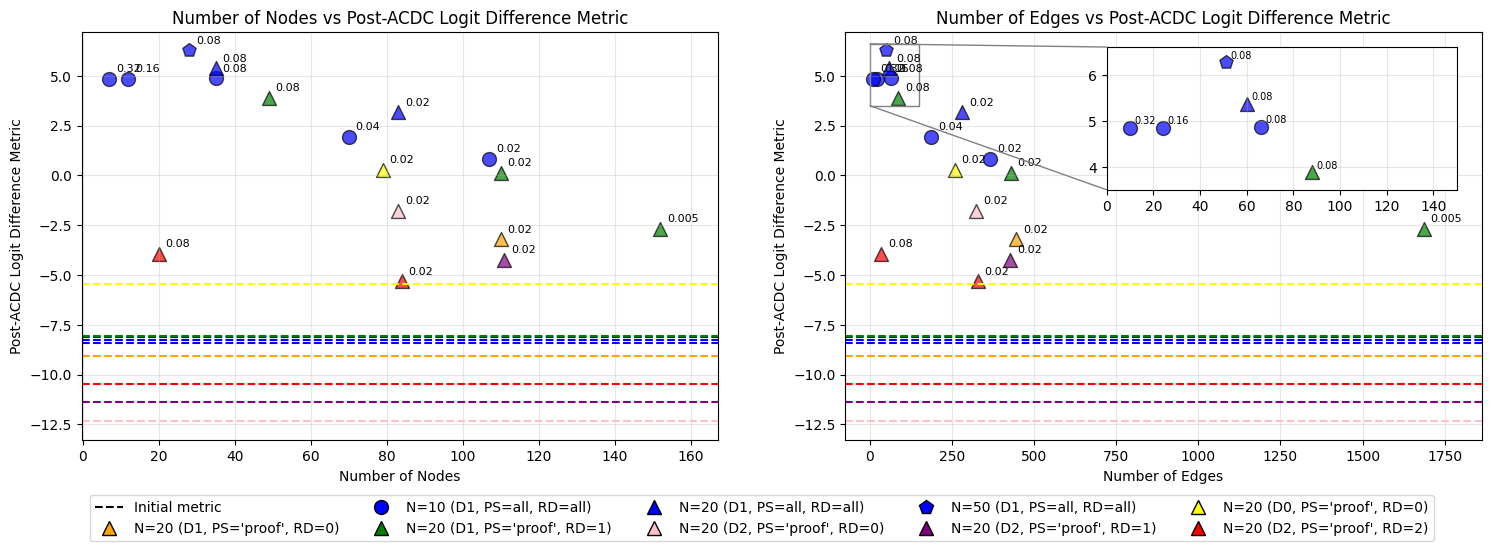

In [20]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, LogNorm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes, inset_axes


# Create a custom colormap (blue gradient)
cmap = LinearSegmentedColormap.from_list('BlueGradient', ['blue', 'azure'])
cmap_proof = LinearSegmentedColormap.from_list('GreenGradient', ['green', 'honeydew'])

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16, 6))

# # Find global min and max threshold values across all dataframes
# all_thresholds = []
# for nodes_df, edges_df in zip(node_dataframes[:-1], edge_dataframes[:-1]):
#     if not nodes_df.empty:
#         all_thresholds.extend(nodes_df['threshold'].values)
#     if not edges_df.empty:
#         all_thresholds.extend(edges_df['threshold'].values)

# vmin = min(all_thresholds)
# vmax = max(all_thresholds)


# all_proof_thresholds = list(node_dataframes[-1]['threshold'].values)
# all_proof_thresholds.extend(edge_dataframes[-1]['threshold'].values)

# vmin_proof = min(all_proof_thresholds)
# vmax_proof = max(all_proof_thresholds)


# # Create a normalization object
# norm = LogNorm(vmin=vmin, vmax=vmax)
# norm_proof = LogNorm(vmin=vmin_proof, vmax=vmax_proof)

# # Keep track of legend elements
# legend_elements = []
# legend_labels = []

# Add initial metric line to legend (will only do this once)
initial_line_added = False

for i, (nodes_df, edges_df) in enumerate(zip(node_dataframes, edge_dataframes)):
    marker = markers[i]
    label = labels[i]
    color = colors[i]

    # Use green colormap for the proof strategy group
    # current_cmap = cmap_proof if label == "(N=20, PS='proof', RD=1)" else cmap
    
    # Plot 1: Nodes vs cur_metric
    if not nodes_df.empty:
        scatter1 = ax1.scatter(nodes_df['acdc_num_nodes'], nodes_df['cur_metric'], marker=marker,
                            c=color,
                            alpha=0.7, s=100, edgecolors='black', label='Post-ACDC '+label)
        ax1.axhline(y=nodes_df['full_model_metric'][0], color=color, linestyle='--', 
                    label=f'Initial metric: {nodes_df["full_model_metric"][0]:.4f}')
        # ax1.legend(loc='best')
        ax1.set_xlabel('Number of Nodes')
        ax1.set_ylabel('Post-ACDC Logit Difference Metric')
        ax1.set_title('Number of Nodes vs Post-ACDC Logit Difference Metric')
        ax1.grid(True, alpha=0.3)

        # # Add initial metric line to legend only once
        # if not initial_line_added:
        #     legend_elements.append(Line2D([0], [0], color='black', linestyle='--', 
        #                                  label=f'Initial metric'))
        #     legend_labels.append(f'Initial metric')
        #     initial_line_added = True

        # # Add to legend elements (only once per marker type)
        # if not any(isinstance(elem, plt.Line2D) and elem.get_label() == label for elem in legend_elements):
        #     legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=color,
        #                                  markersize=10, markeredgecolor='black', label=label))
        #     legend_labels.append(label)
        
        # Annotate points with run names
        for i, row in nodes_df.iterrows():
            ax1.annotate(row['threshold'], 
                        (row['acdc_num_nodes'], row['cur_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax1.text(0.5, 0.5, "No data available", ha='center', va='center')

    # Plot 2: Edges vs cur_metric
    if not edges_df.empty:
        scatter2 = ax2.scatter(edges_df['acdc_num_edges'], edges_df['cur_metric'], marker=marker,
                            c=color,
                            alpha=0.7, s=100, edgecolors='black', label=label)
        ax2.axhline(y=edges_df['full_model_metric'][0], color=color, linestyle='--', 
                    label=f'Initial metric: {edges_df["full_model_metric"][0]:.4f}')
        # ax2.legend(loc='best')
        ax2.set_xlabel('Number of Edges')
        ax2.set_ylabel('Post-ACDC Logit Difference Metric')
        ax2.set_title('Number of Edges vs Post-ACDC Logit Difference Metric')
        ax2.grid(True, alpha=0.3)

        
        # Annotate points with run names
        for i, row in edges_df.iterrows():
            ax2.annotate(row['threshold'], 
                        (row['acdc_num_edges'], row['cur_metric']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    else:
        ax2.text(0.5, 0.5, "No data available", ha='center', va='center')

# Add margin to the right side of all plots
for ax in [ax1, ax2]:
    # Get current x limits
    x_min, x_max = ax.get_xlim()
    
    # Calculate the data range and add a percentage as margin
    data_range = x_max - x_min
    margin = 0.05 * data_range  # 10% of the data range
    
    # Set new x limits with extra margin on the right
    ax.set_xlim(x_min, x_max + margin)

# Clear any existing legend elements and labels
legend_elements = []
legend_labels = []

# Add initial metric line to legend
legend_elements.append(Line2D([0], [0], color='black', linestyle='--', label='Initial metric'))
legend_labels.append('Initial metric')

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='orange',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D1, PS='proof', RD=0)")

legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=10 (D1, PS=all, RD=all)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='green',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D1, PS='proof', RD=1)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='blue',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D1, PS=all, RD=all)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='pink',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D2, PS='proof', RD=0)")

legend_elements.append(Line2D([0], [0], marker='p', color='w', markerfacecolor='blue',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=50 (D1, PS=all, RD=all)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='purple',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D2, PS='proof', RD=1)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='yellow',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D0, PS='proof', RD=0)")

legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='red',
                             markersize=10, markeredgecolor='black'))
legend_labels.append("N=20 (D2, PS='proof', RD=2)")







# # Create the legend with the custom elements
# fig.legend(legend_elements, legend_labels, 
#           loc='lower center', bbox_to_anchor=(0.5, 0.02), 
#           ncol=3, frameon=True, fontsize=9)
# Create a single legend for the entire figure at the bottom
# fig.legend(legend_elements, legend_labels, 
#             loc='lower center', bbox_to_anchor=(0.5, 0.02), 
#             ncol=len(legend_elements), frameon=True)

# Instead, create one colorbar for the entire figure
# sm = ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # Dummy array for the colorbar
# sm_proof = ScalarMappable(cmap=cmap_proof, norm=norm_proof)
# sm_proof.set_array([])  # Dummy array for the colorbar

# Create a single legend for the entire figure at the bottom in two rows
fig.legend(legend_elements, legend_labels, 
          loc='lower center', bbox_to_anchor=(0.55, 0.02), 
          ncol=5, frameon=True)  # Set ncol to 5 for two rows

# Then adjust the bottom margin to make room for the two-row legend
fig.subplots_adjust(right=1, bottom=0.2)

# # Create a new axis for the colorbar
# cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [x, y, width, height]
# # Create a new axis for the proof strategy colorbar
# cbar_ax_proof = fig.add_axes([0.94, 0.15, 0.02, 0.7])  # [x, y, width, height]

# # Add the colorbar to this axis
# cbar = fig.colorbar(sm, cax=cbar_ax)
# cbar.set_label('Threshold Value')
# cbar_proof = fig.colorbar(sm_proof, cax=cbar_ax_proof)
# cbar_proof.set_label('Threshold Value')

# cbar.set_ticks(all_thresholds)
# cbar_proof.set_ticks(all_proof_thresholds)

# # Format the tick labels to show the exact threshold values
# cbar.set_ticklabels([f"{t}" for t in all_thresholds])
# cbar_proof.set_ticklabels([f"{t}" for t in all_proof_thresholds])

# # Adjust tick parameters for better visibility
# cbar.ax.tick_params(labelsize=8)  # Smaller font size if needed
# cbar_proof.ax.tick_params(labelsize=8)

# Define the region to zoom in on 
x_min, x_max = 0, 150  # X-range for zoomed region
y_min, y_max = 3.5, 6.6  # Y-range for zoomed region

# Create the zoomed inset axes
# axins = zoomed_inset_axes(ax2, zoom=3, loc=9)  # loc=1 means upper right
axins = inset_axes(ax2, width="55%", height="35%", 
                   bbox_to_anchor=(0.40, -0.02, 1, 1),  # (x, y, width, height) relative to parent axes
                   bbox_transform=ax2.transAxes, 
                   loc=2)  # loc=2 means upper left corner of the inset is at the specified position

# Plot the same data in the inset
for i, edges_df in enumerate(edge_dataframes):
    if not edges_df.empty:
        marker = markers[i]
        label = labels[i]
        color = colors[i]

        # Use green colormap for the proof strategy group
        # current_cmap = cmap_proof if label == "(N=20, PS='proof', RD=1)" else cmap
        
        # Plot points in the inset
        axins.scatter(edges_df['acdc_num_edges'], edges_df['cur_metric'], 
                      marker=marker, c=color, 
                      alpha=0.7, s=100, 
                      edgecolors='black')
        
        # Annotate points in the inset (optional - might get crowded)
        for j, row in edges_df.iterrows():
            if (x_min <= row['acdc_num_edges'] <= x_max and 
                y_min <= row['cur_metric'] <= y_max):
                axins.annotate(row['threshold'], 
                             (row['acdc_num_edges'], row['cur_metric']),
                             xytext=(3, 3), textcoords='offset points',
                             fontsize=7)

# Set the limits for the inset
axins.set_xlim(x_min, x_max)
axins.set_ylim(y_min, y_max)

# Add a grid to the inset for better readability
axins.grid(True, alpha=0.3)

# Draw connecting lines between the main plot and the inset
mark_inset(ax2, axins, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()